In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import itertools
import re

In [ ]:
caption_paths = [
    # '../data/US-Capydata-ViSportIC/dataset/test/captions.txt', 
    '../data/US-Capydata-ViSportIC/dataset/train/captions.txt', 
    '../data/US-Capydata-ViSportIC/dataset/val/captions.txt'
]

# Đọc file và tách caption
captions = []

for path in caption_paths:
    with open(path, "r", encoding="utf-8") as file:
        for line in file:
            parts = line.strip().split("\t", 1)  # Tách tên file và caption
            if len(parts) == 2:
                captions.append(parts[1].lower())  # Chuyển thành chữ thường

print(f"Số lượng caption trước khi lọc trùng lặp: {len(captions)}")

# Loại bỏ caption trùng lặp
captions = list(set(captions))
print(f"Số lượng caption sau khi lọc trùng lặp: {len(captions)}")

# Xử lý văn bản: Loại bỏ dấu câu và tokenization
processed_captions = []
for caption in captions:
    caption = re.sub(r"[^\w\s]", "", caption)  # Loại bỏ dấu câu
    caption = re.sub(r"\d+", "", caption)  # Loại bỏ số

    words = caption.split()  # Tokenization
    processed_captions.append(words)


word_counts = Counter(word for caption in processed_captions for word in caption)

# Lọc từ xuất hiện ít hơn min_freq
min_freq = 2  # Có thể điều chỉnh
vocab = {word for word, count in word_counts.items() if count >= min_freq}

# Tạo word2idx với token đặc biệt cố định
word2idx = {
    "<pad>": 0,
    "<unk>": 1,
    "<s>": 2,
    "</s>": 3,
}

# Thêm các từ còn lại vào word2idx, bắt đầu từ 4
for idx, word in enumerate(sorted(vocab), start=4):
    word2idx[word] = idx

# Lưu từ vựng vào file txt
with open("../vocab/global_vocab.txt", "w", encoding="utf-8") as f:
    for word, idx in sorted(word2idx.items(), key=lambda x: x[1]):
        f.write(f"{idx}\t{word}\n")

Số lượng caption trước khi lọc trùng lặp: 24635
Số lượng caption sau khi lọc trùng lặp: 17586


In [17]:
with open('../data/UIT-ViIC/dataset/test/captions.txt', 'r', encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split("\t", 1)  # Tách tên file và caption
        if len(parts) == 2:
            captions.append(parts[1].lower())  # Chuyển thành chữ thường

# Đếm tần suất từ
word_counts = Counter(word for caption in processed_captions for word in caption)

# Loại bỏ caption trùng lặp
captions = list(set(captions))

# Tính toán một số thống kê
total_words = sum(word_counts.values())  # Tổng số từ (bao gồm cả từ lặp lại)
unique_words = len(word_counts)  # Số lượng từ duy nhất
rare_words = sum(1 for count in word_counts.values() if count < min_freq)  # Số từ xuất hiện ít hơn min_freq
common_words_count = sum(1 for count in word_counts.values() if count >= 10)  # Số từ xuất hiện trên 10 lần
# Tính tổng số từ trong tất cả caption
total_words_in_sentences = sum(len(caption) for caption in processed_captions)

# Tính số câu
total_sentences = len(processed_captions)

# Tính độ dài trung bình của một câu
average_sentence_length = total_words_in_sentences / total_sentences if total_sentences > 0 else 0

# In thống kê
print("Thống kê bô dữ liệu captions:")
print(f"- Tổng số từ xuất hiện: {total_words}")
print(f"- Số lượng từ duy nhất: {unique_words}")
print(f"- Số lượng từ xuất hiện ít hơn {min_freq} lần: {rare_words}")
print(f"- Số lượng từ xuất hiện hơn 10 lần: {common_words_count}")
print(f"- Tổng số câu (captions): {total_sentences}")
print(f"- Độ dài trung bình mỗi câu: {average_sentence_length:.2f} từ")


Thống kê bô dữ liệu captions:
- Tổng số từ xuất hiện: 197525
- Số lượng từ duy nhất: 2291
- Số lượng từ xuất hiện ít hơn 2 lần: 678
- Số lượng từ xuất hiện hơn 10 lần: 860
- Tổng số câu (captions): 16045
- Độ dài trung bình mỗi câu: 12.31 từ


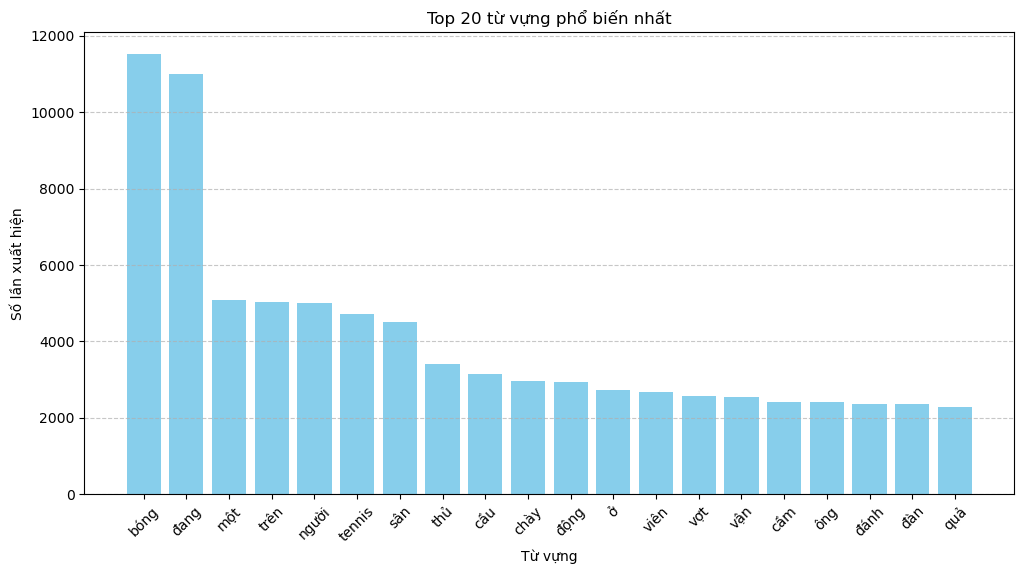

In [18]:
# Lấy 20 từ phổ biến nhất
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color="skyblue")
plt.xlabel("Từ vựng")
plt.ylabel("Số lần xuất hiện")
plt.title("Top 20 từ vựng phổ biến nhất")
plt.xticks(rotation=45) 
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

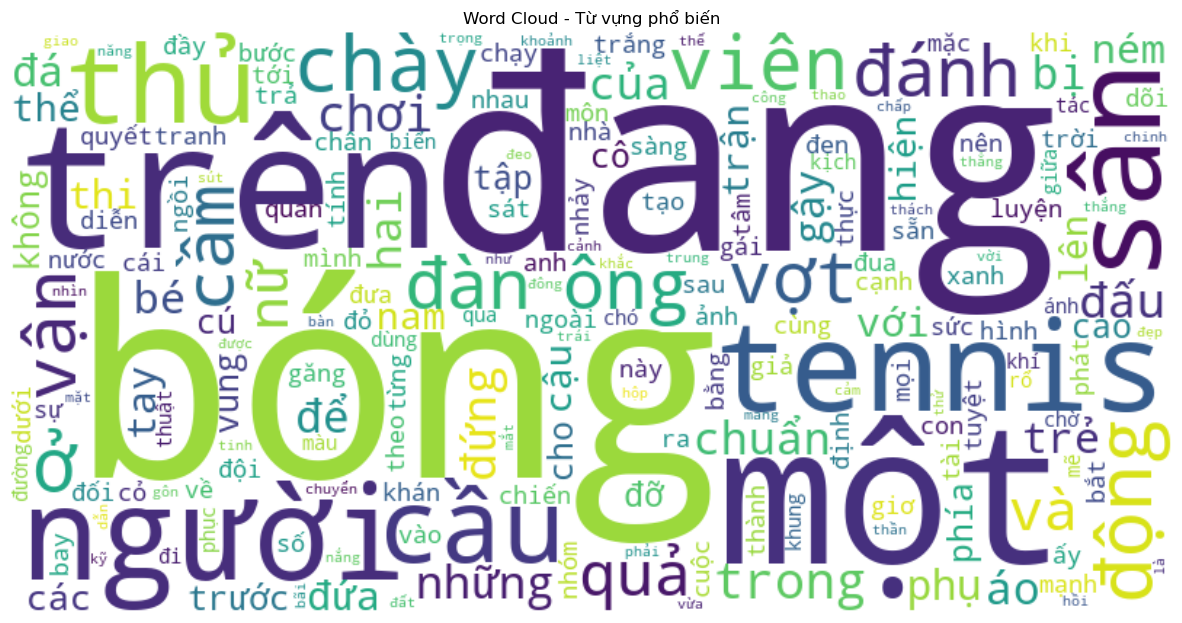

In [19]:
# Tạo WordCloud từ từ điển word_counts
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# Hiển thị WordCloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Tắt trục
plt.title("Word Cloud - Từ vựng phổ biến")
plt.show()

In [21]:
# Hàm vẽ biểu đồ bigram/trigram
def ngram(processed_captions): 

    def plot_ngrams(ngram_counts, title):
        ngrams, counts = zip(*ngram_counts)
        ngrams = [" ".join(ngram) for ngram in ngrams]  # Chuyển tuple thành chuỗi

        plt.figure(figsize=(15, 5))
        sns.barplot(x=list(counts), y=list(ngrams), hue=list(ngrams), dodge=False, palette="viridis", legend=False)
        plt.xlabel("Tần suất xuất hiện")
        plt.ylabel("N-gram")
        plt.grid(axis="x", linestyle="--", alpha=0.7)
        plt.title(title)
        plt.show()

    # Tạo bigram & trigram từ captions
    bigrams = list(itertools.chain.from_iterable(zip(caption, caption[1:]) for caption in processed_captions))
    trigrams = list(itertools.chain.from_iterable(zip(caption, caption[1:], caption[2:]) for caption in processed_captions))

    # Đếm tần suất
    bigram_counts = Counter(bigrams).most_common(10)
    trigram_counts = Counter(trigrams).most_common(10)

    # Vẽ biểu đồ
    plot_ngrams(bigram_counts, "Top 10 Bigram Phổ Biến")
    plot_ngrams(trigram_counts, "Top 10 Trigram Phổ Biến")

UIT-ViIC

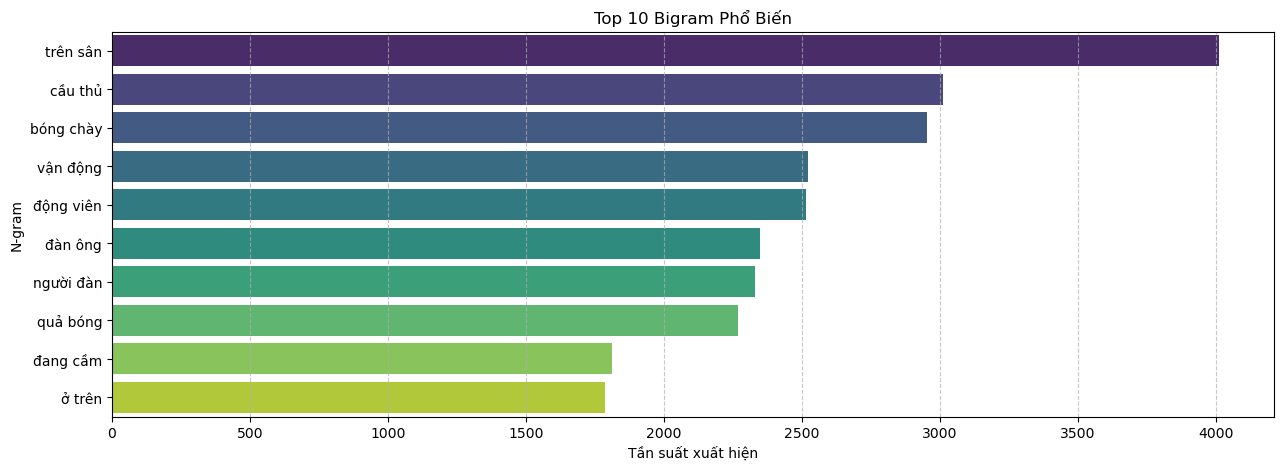

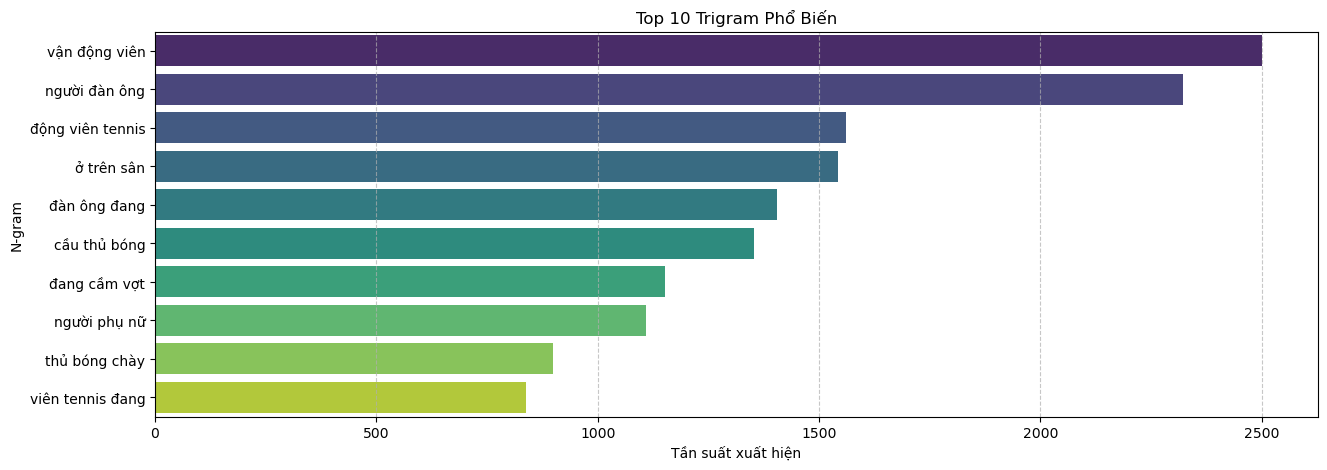

In [22]:
ngram(processed_captions)